In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

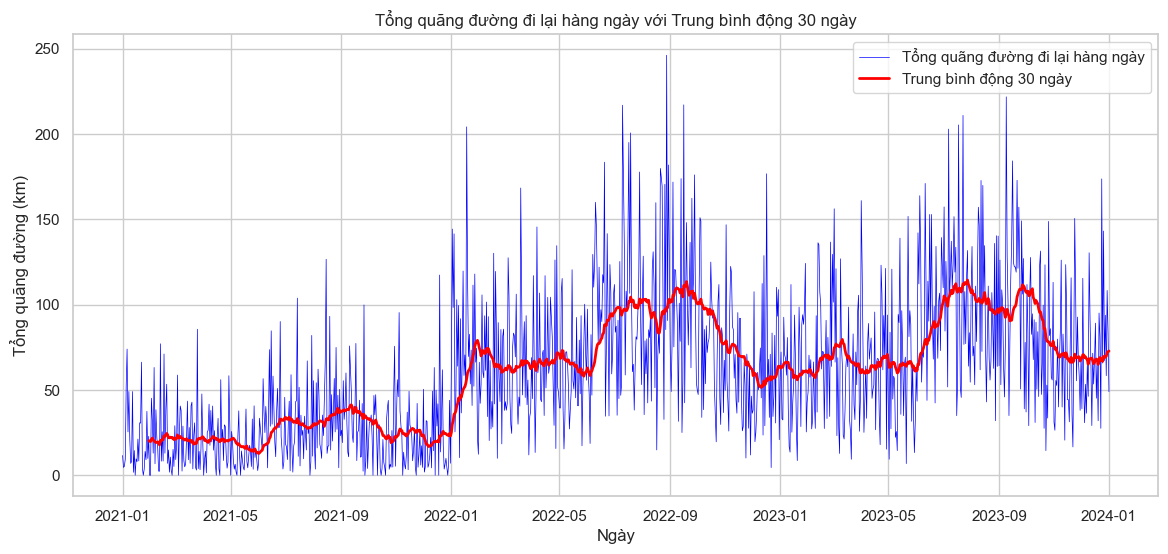

In [9]:
df = pd.read_csv("data/du_lieu_di_chuyen.csv", parse_dates=['Ngày'])

sns.set(style="whitegrid")

df['Trung bình động 30 ngày'] = df['Tổng quãng đường đi lại'].rolling(window=30).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['Ngày'], df['Tổng quãng đường đi lại'], color='blue', linewidth=0.5, label="Tổng quãng đường đi lại hàng ngày")
plt.plot(df['Ngày'], df['Trung bình động 30 ngày'], color='red', linewidth=2, label="Trung bình động 30 ngày")


plt.title("Tổng quãng đường đi lại hàng ngày với Trung bình động 30 ngày")
plt.xlabel("Ngày")
plt.ylabel("Tổng quãng đường (km)")
plt.legend()
plt.show()

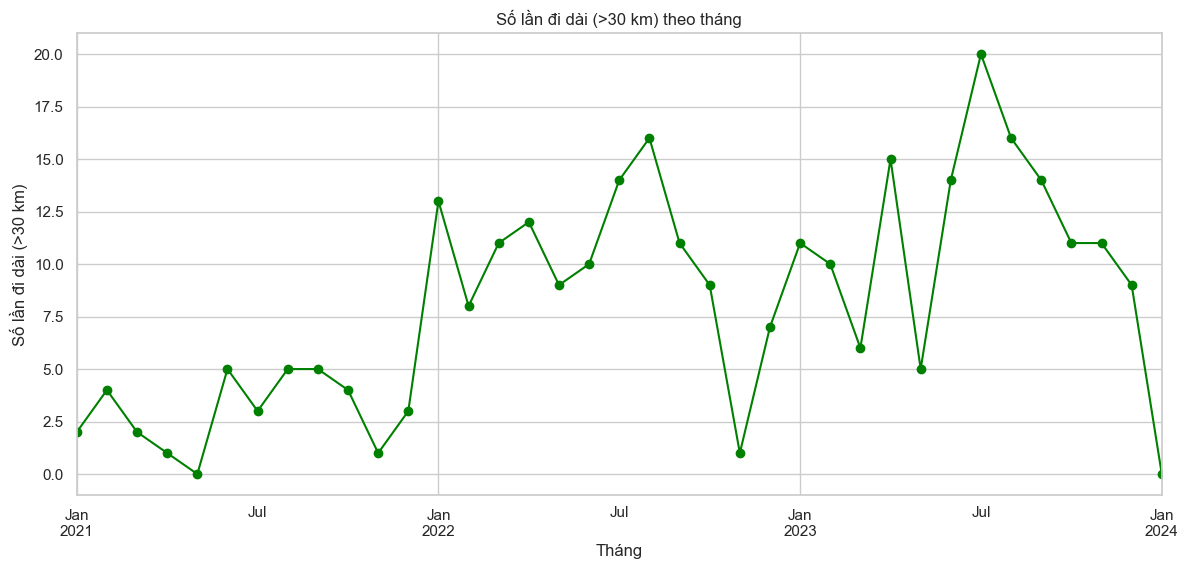

In [13]:
# Tính số lần đi dài theo từng tháng
df['Tháng'] = df['Ngày'].dt.to_period('M')
monthly_long_trips = df.groupby('Tháng')['Số lần đi dài (>30 km)'].sum()

# Vẽ line plot
plt.figure(figsize=(14, 6))
monthly_long_trips.plot(kind='line', color='green', marker='o')
plt.title('Số lần đi dài (>30 km) theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lần đi dài (>30 km)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


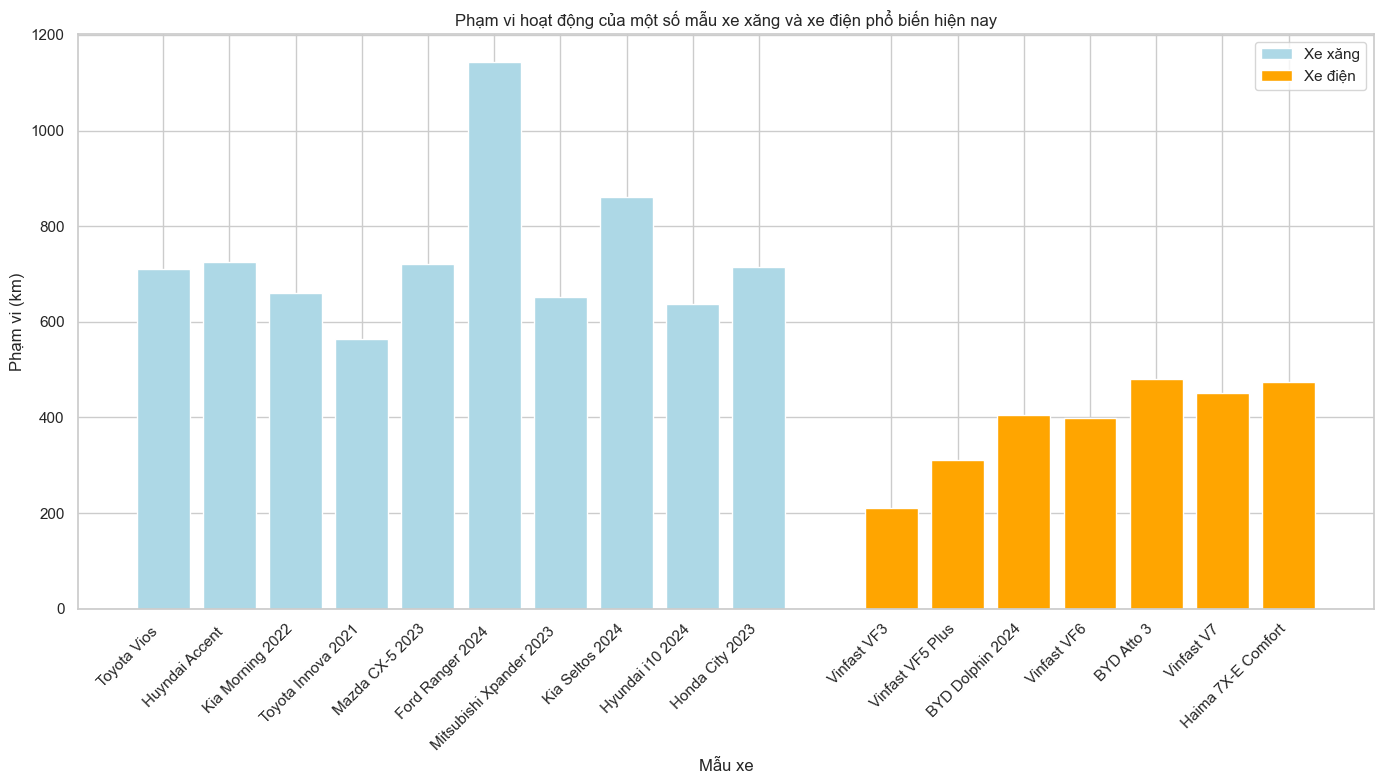

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'data/thong_so_ky_thuat.csv'  
data = pd.read_csv(file_path)

data['Phạm vi hoạt động'] = data['Phạm vi hoạt động'].replace({',': '.'}, regex=True).astype(float)
data['Xe'] = data['Xe'].astype(str)

# Phân chia thành xe xăng và xe điện
gasoline_cars = data.iloc[:10]   # 10 xe đầu là xe xăng
electric_cars = data.iloc[10:]   # Các xe còn lại là xe điện

# Tính toán vị trí của các cột trên trục x, với khoảng cách giữa hai nhóm xe
x_gasoline = np.arange(len(gasoline_cars))
x_electric = np.arange(len(electric_cars)) + len(gasoline_cars) + 1  # Đặt xe điện cách xe xăng một khoảng

# Vẽ biểu đồ cột cho phạm vi hoạt động của hai nhóm
fig, ax = plt.subplots(figsize=(14, 8))

# Vẽ phạm vi hoạt động của xe xăng với màu xanh dương nhạt
ax.bar(x_gasoline, gasoline_cars['Phạm vi hoạt động'], label='Xe xăng', color='lightblue')

# Vẽ phạm vi hoạt động của xe điện với màu cam
ax.bar(x_electric, electric_cars['Phạm vi hoạt động'], label='Xe điện', color='orange')

# Gộp các nhãn của cả hai nhóm
all_labels = gasoline_cars['Xe'].tolist() + electric_cars['Xe'].tolist()
ax.set_xticks(np.concatenate([x_gasoline, x_electric]))
ax.set_xticklabels(all_labels, rotation=45, ha='right')

# Đặt tên trục và tiêu đề
ax.set_xlabel('Mẫu xe')
ax.set_ylabel('Phạm vi (km)')
ax.set_title('Phạm vi hoạt động của một số mẫu xe xăng và xe điện phổ biến hiện nay')

# Thêm chú thích
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


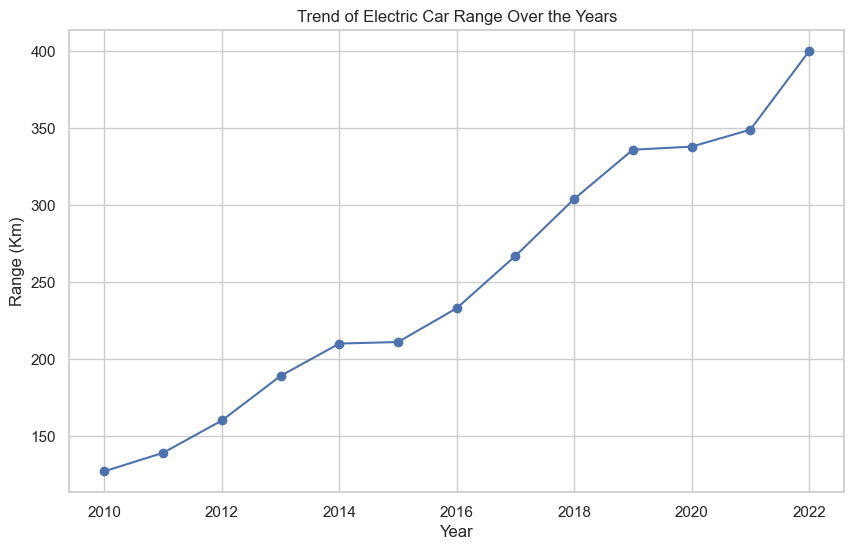

In [ ]:
file_path = 'data/car_prices/Electric_cars.csv' 
electric_cars_df = pd.read_csv(file_path)


electric_cars_df['Year'] = pd.to_numeric(electric_cars_df['Year'], errors='coerce')
electric_cars_df['Mileage (Km)'] = pd.to_numeric(electric_cars_df['Mileage (Km)'], errors='coerce')
electric_cars_df = electric_cars_df.dropna(subset=['Year', 'Mileage (Km)'])


plt.figure(figsize=(10, 6))
plt.plot(electric_cars_df['Year'], electric_cars_df['Mileage (Km)'], marker='o', linestyle='-', color='b')
plt.title('Phạm vi hoạt động trung bình của xe điện trên thế giới')
plt.xlabel('Year')
plt.ylabel('Range (Km)')
plt.grid(True)
plt.show()